In [2]:
import warnings
import random
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [3]:
data = pd.read_csv('/home/dangdbh/Downloads/time-series-prediction-testcases/demo_aws_forecast/input_AWS_predict/request.csv', engine='python', names=['timestamp', 'metric_value'], skiprows=1)
data['timestamp']=pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')
data.set_index(['timestamp'], inplace=True)

In [4]:
data2 = pd.read_csv('/home/dangdbh/Downloads/time-series-prediction-testcases/demo_aws_forecast/input_AWS_predict/data_transfer.csv', engine='python', names=['timestamp', 'metric_value'], skiprows=1)
data2['timestamp']=pd.to_datetime(data2['timestamp'], format='%Y-%m-%d %H:%M:%S')
data2.set_index(['timestamp'], inplace=True)

In [5]:
data3 = pd.read_csv('/home/dangdbh/Downloads/time-series-prediction-testcases/demo_aws_forecast/input_AWS_predict/s3.csv', engine='python', names=['timestamp', 'metric_value'], skiprows=1)
data3['timestamp']=pd.to_datetime(data3['timestamp'], format='%Y-%m-%d %H:%M:%S')
data3.set_index(['timestamp'], inplace=True)

In [5]:
predict_len =275

In [6]:
data
# data['s3.request'] = data['metric_value']

,metric_value
timestamp,
2019-11-30 17:00:00,6150.0
2019-11-30 18:00:00,3800.0
2019-11-30 19:00:00,2960.0
2019-11-30 20:00:00,2190.0
2019-11-30 21:00:00,1160.0
2019-11-30 22:00:00,800.0
2019-11-30 23:00:00,410.0
2019-12-01 00:00:00,1890.0
2019-12-01 01:00:00,3270.0


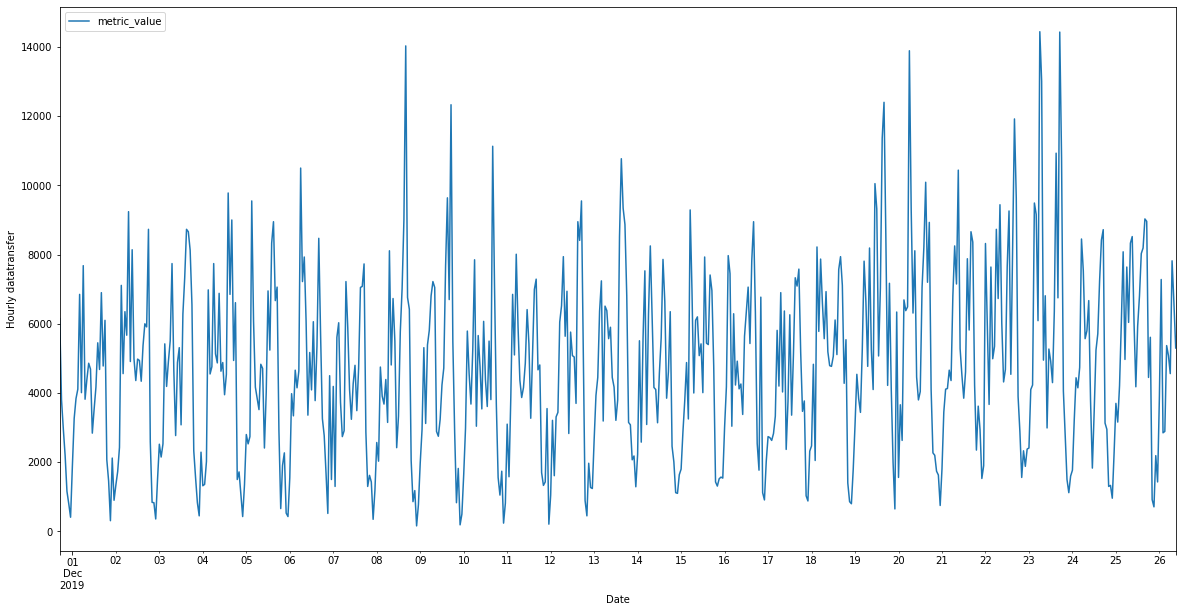

In [7]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
# # plt.rcParams.update({'font.size': 12})
# # plt.style.use('ggplot')
data.plot()
plt.ylabel('Hourly datatransfer')
plt.xlabel('Date')
plt.legend(loc=2)
plt.show()

In [8]:
data.head()

,metric_value
timestamp,
2019-11-30 17:00:00,6150.0
2019-11-30 18:00:00,3800.0
2019-11-30 19:00:00,2960.0
2019-11-30 20:00:00,2190.0
2019-11-30 21:00:00,1160.0


In [72]:
train_data = data['2019-11-30 17:00:00':'2019-12-19 22:00:00']
test_data = data['2019-12-19 23:00:00':'2019-12-26 09:00:00']
train_len = len(train_data)
test_len = len(test_data)

In [10]:
### ARIMA model

In [11]:
p = q = d = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [12]:
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

In [13]:
train_data = data['2019-11-30 17:00:00':'2019-12-19 22:00:00']
test_data = data['2019-12-19 23:00:00':'2019-12-26 09:00:00']

In [14]:
print(train_data)

                     metric_value
timestamp                        
2019-11-30 17:00:00        6150.0
2019-11-30 18:00:00        3800.0
2019-11-30 19:00:00        2960.0
2019-11-30 20:00:00        2190.0
2019-11-30 21:00:00        1160.0
...                           ...
2019-12-19 18:00:00        4220.0
2019-12-19 19:00:00        7170.0
2019-12-19 20:00:00        4100.0
2019-12-19 21:00:00        1990.0
2019-12-19 22:00:00         650.0

[462 rows x 1 columns]


In [14]:
warnings.filterwarnings("ignore")

In [16]:
AIC = []
ARIMA_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_data,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            ARIMA_model.append([param, param_seasonal])
        except Exception as e:
            print(e)
            continue

NameError: name 'pdq' is not defined

In [21]:
len(ARIMA_model)

729

In [22]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), ARIMA_model[AIC.index(min(AIC))][0],ARIMA_model[AIC.index(min(AIC))][1]))

The smallest AIC is 8072.256108194551 for model SARIMAX(0, 0, 0)x(2, 2, 2, 24)


In [128]:
mod = SARIMAX(train_data,
              order=ARIMA_model[AIC.index(min(AIC))][0],
              seasonal_order=ARIMA_model[AIC.index(min(AIC))][1],
              enforce_stationarity=False,
              enforce_invertibility=False)
arima_fit = mod.fit()

In [8]:
# best param

In [25]:
mod = SARIMAX(train_data,
              order=(0,0,0),
              seasonal_order=(2,2,2,24),
              enforce_stationarity=False,
              enforce_invertibility=False)
arima_fit = mod.fit()

/home/dangdbh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [34]:
pred2 = arima_fit.get_forecast('2019-12-31 09:00:00')
pred2_ci = pred2.conf_int()

In [40]:
pred3 = arima_fit.predict(start='2019-12-19 23:00:00', end='2019-12-31 09:00:00')

In [58]:
pred2.prediction_results

In [65]:
arima_fit.get_forecast()

In [149]:
pred2_ci

,lower metric_value,upper metric_value
2019-12-19 23:00:00,-1641.006076,5472.547284
2019-12-20 00:00:00,-681.243734,6432.309626
2019-12-20 01:00:00,1089.266954,8202.820314
2019-12-20 02:00:00,277.761171,7391.314531
2019-12-20 03:00:00,1661.112510,8774.665870
2019-12-20 04:00:00,1594.406844,8707.960204
2019-12-20 05:00:00,4144.446097,11257.999457
2019-12-20 06:00:00,2804.947559,9918.500919
2019-12-20 07:00:00,1968.755587,9082.308947
2019-12-20 08:00:00,3542.656289,10656.209649


In [28]:
pred2.predicted_mean['2019-12-26 10:00:00':'2019-12-31 09:00:00']

2019-12-26 10:00:00     4190.731586
2019-12-26 11:00:00     8171.900964
2019-12-26 12:00:00     8343.307592
2019-12-26 13:00:00     6171.938539
2019-12-26 14:00:00     6328.163461
2019-12-26 15:00:00    10446.943251
2019-12-26 16:00:00    10518.821950
2019-12-26 17:00:00     7546.166186
2019-12-26 18:00:00     4271.288666
2019-12-26 19:00:00     6294.385207
2019-12-26 20:00:00     4482.878872
2019-12-26 21:00:00     1737.042806
2019-12-26 22:00:00      965.319341
2019-12-26 23:00:00     2385.189396
2019-12-27 00:00:00     3246.535182
2019-12-27 01:00:00     5705.096113
2019-12-27 02:00:00     4128.327288
2019-12-27 03:00:00     5134.788659
2019-12-27 04:00:00     5244.392558
2019-12-27 05:00:00     9127.981482
2019-12-27 06:00:00     6390.178652
2019-12-27 07:00:00     5411.729058
2019-12-27 08:00:00     7674.640227
2019-12-27 09:00:00     5759.747503
2019-12-27 10:00:00     4210.256185
2019-12-27 11:00:00     8407.682879
2019-12-27 12:00:00     8591.053513
2019-12-27 13:00:00     6246

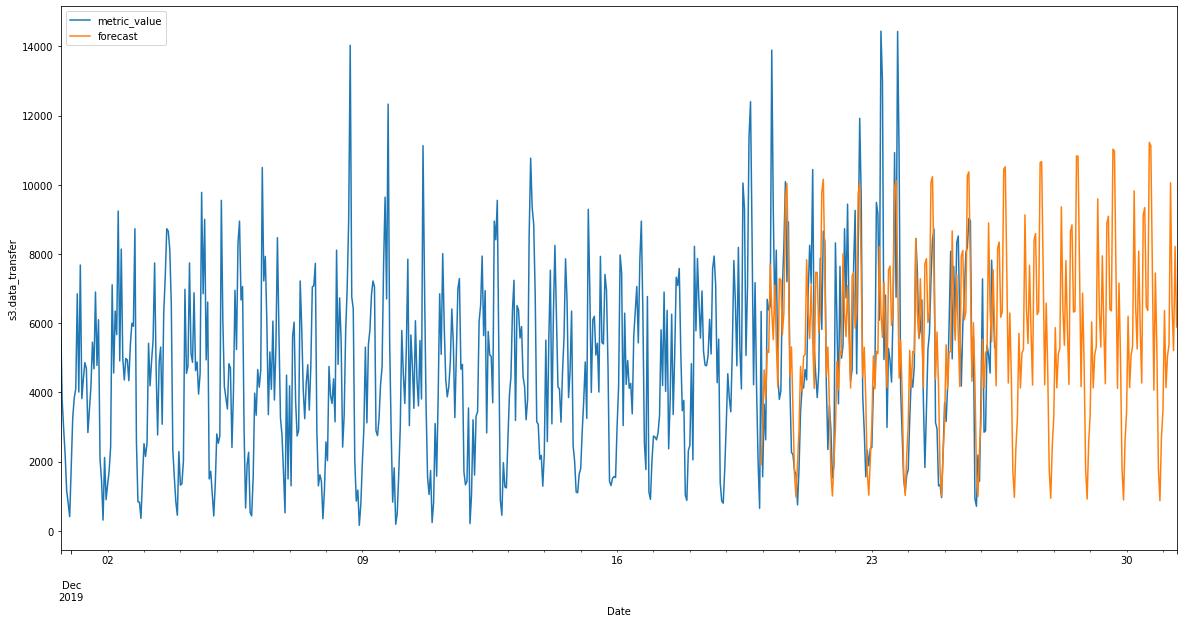

In [29]:
ax = data.plot(figsize=(20, 10))
pred2.predicted_mean.plot(ax=ax, label='forecast')
# ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('s3.data_transfer')
plt.xlabel('Date')
plt.legend(loc=2)
plt.show()


In [30]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data['metric_value'], pred2.predicted_mean['2019-12-19 23:00:00':'2019-12-26 09:00:00']))
rmse = round(rmse, 3)
rmse

2370.96

In [31]:
# Mean Absolute Percentage Error
abs_error = np.abs(test_data['metric_value']-pred2.predicted_mean['2019-12-19 23:00:00':'2019-12-26 09:00:00'])
actual = test_data['metric_value']
mape = np.round(np.mean(np.abs(abs_error/actual)),3)
mape

0.402

In [32]:
predict_len = len(pred2.predicted_mean)

In [33]:
len(pred2.predicted_mean)

275

,metric_value
timestamp,
2019-11-30 17:00:00,6150.0
2019-11-30 18:00:00,3800.0
2019-11-30 19:00:00,2960.0
2019-11-30 20:00:00,2190.0
2019-11-30 21:00:00,1160.0
...,...
2019-12-19 18:00:00,4220.0
2019-12-19 19:00:00,7170.0
2019-12-19 20:00:00,4100.0


In [125]:
# Moving average

In [116]:
df1 = data.copy()
train_len = 462
train=data[0:train_len] 
test=data[train_len:]

In [117]:
x_train = train.drop('metric_value', axis=1)
x_test = test.drop('metric_value', axis=1)
y_train = train[['metric_value']]
y_test = test[['metric_value']]

In [118]:
for i in range(1,13):
    df1['moving_avg_forecast'] = data['metric_value'].rolling(i).mean()
    train=df1[0:train_len] 
    test=df1[train_len:]
    y_hat_avg = test.copy()
    rmse = np.sqrt(mean_squared_error(test.metric_value, y_hat_avg.moving_avg_forecast))
    abs_error = np.abs(y_test['metric_value']-y_hat_avg.moving_avg_forecast)
    actual = y_test['metric_value']
    mape = np.round(np.mean(abs_error/actual),4)
    print('Rolling window : ',i,'RMSE : ' ,np.round(rmse,2) ,'MAPE : ',mape)

Rolling window :  1 RMSE :  0.0 MAPE :  0.0
Rolling window :  2 RMSE :  10677.72 MAPE :  0.4278
Rolling window :  3 RMSE :  13743.37 MAPE :  0.6786
Rolling window :  4 RMSE :  15264.16 MAPE :  0.8636
Rolling window :  5 RMSE :  16795.72 MAPE :  1.1417
Rolling window :  6 RMSE :  18071.04 MAPE :  1.4344
Rolling window :  7 RMSE :  18518.7 MAPE :  1.535
Rolling window :  8 RMSE :  18801.74 MAPE :  1.6118
Rolling window :  9 RMSE :  18945.73 MAPE :  1.6227
Rolling window :  10 RMSE :  19151.95 MAPE :  1.6061
Rolling window :  11 RMSE :  19223.87 MAPE :  1.5886
Rolling window :  12 RMSE :  19182.97 MAPE :  1.5812


In [119]:
df1['moving_avg_forecast'] = data['metric_value'].rolling(2).mean()

In [120]:
train=df1[0:train_len] 
test=df1[train_len:]

In [121]:
y_hat_avg = test.copy()

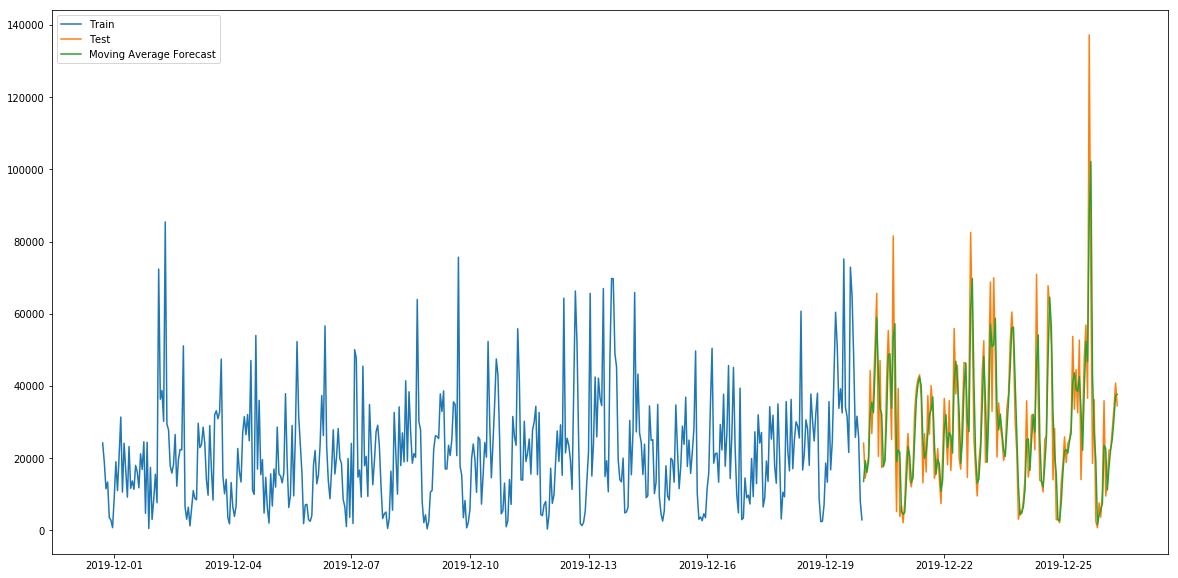

In [122]:
plt.figure(figsize=(20,10))
plt.plot(train['metric_value'], label='Train')
plt.plot(test['metric_value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [123]:
y_hat_avg

,metric_value,moving_avg_forecast
timestamp,,
2019-12-19 23:00:00,24139.567,13506.2675
2019-12-20 00:00:00,14403.444,19271.5055
2019-12-20 01:00:00,17602.032,16002.7380
2019-12-20 02:00:00,20240.700,18921.3660
2019-12-20 03:00:00,44205.667,32223.1835
...,...,...
2019-12-26 05:00:00,22515.045,22324.2445
2019-12-26 06:00:00,27856.550,25185.7975
2019-12-26 07:00:00,33739.422,30797.9860


In [20]:
# Exponetial smoothing

In [21]:
pred = test_data.copy()

In [22]:
ets_fit = ExponentialSmoothing(train_data['metric_value'],seasonal_periods=24 ,trend='add', seasonal='add', freq='H', damped=True).fit(damping_slope=0.2)
ets_fit.params

{'damping_slope': 0.2,
 'initial_level': 7042.500000000113,
 'initial_seasons': array([ -892.5, -3242.5, -4082.5, -4852.5, -5882.5, -6242.5, -6632.5,
        -5152.5, -3772.5, -3202.5, -2932.5,  -192.5, -3032.5,   637.5,
        -3222.5, -2652.5, -2182.5, -2352.5, -4202.5, -3512.5, -2872.5,
        -1592.5, -2362.5,  -142.5]),
 'initial_slope': 16.92708333336486,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.052631578947366676,
 'smoothing_seasonal': 0.1578947368421331,
 'smoothing_slope': 0.05263157894736842,
 'use_boxcox': False}

In [23]:
Forecasting = ets_fit.forecast(predict_len)

In [24]:
idx = pd.date_range(start='2019-12-19 23:00:00', periods=predict_len, freq='H')
Forecasting = pd.Series(Forecasting,index=idx)

In [25]:
Forecasting

2019-12-19 23:00:00    2615.657128
2019-12-20 00:00:00    3595.341742
2019-12-20 01:00:00    4759.958495
2019-12-20 02:00:00    4875.003290
2019-12-20 03:00:00    6362.376563
                          ...     
2019-12-31 05:00:00    7364.961502
2019-12-31 06:00:00    7125.237480
2019-12-31 07:00:00    6825.213492
2019-12-31 08:00:00    6977.821794
2019-12-31 09:00:00    6382.987385
Freq: H, Length: 275, dtype: float64

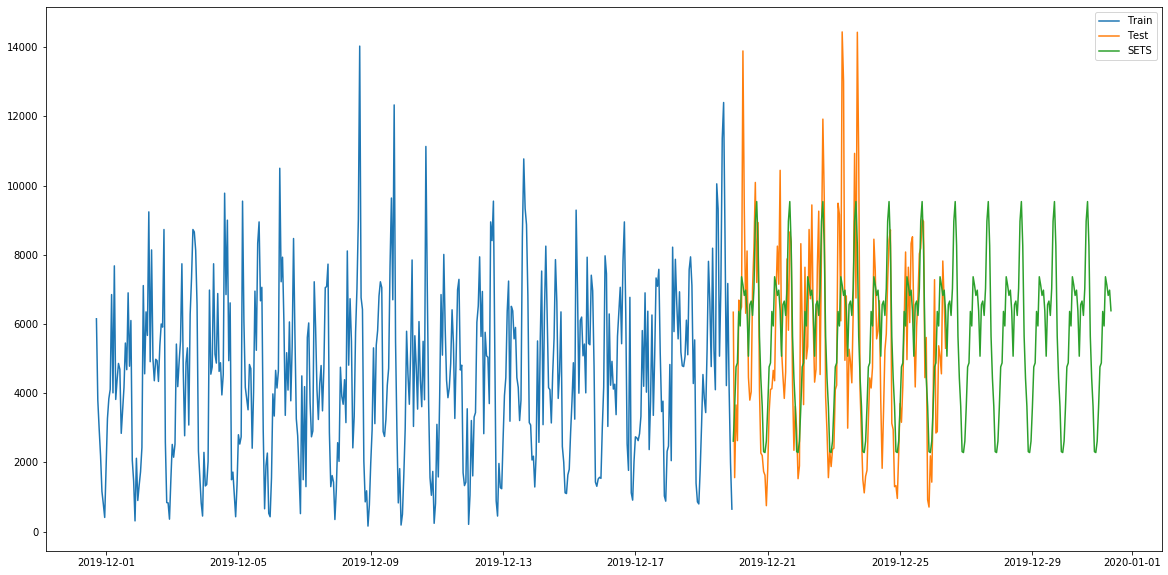

In [26]:
plt.figure(figsize=(20,10))
plt.plot(train_data['metric_value'], label='Train')
plt.plot(test_data['metric_value'], label='Test')
plt.plot(Forecasting, label='SETS')
plt.legend(loc='best')
plt.show()

In [27]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data.metric_value, Forecasting['2019-12-19 23:00:00':'2019-12-26 09:00:00']))
rmse = round(rmse, 3)
rmse

2032.634

In [28]:
# Mean Absolute Percentage Error
abs_error = np.abs(test_data['metric_value']-Forecasting['2019-12-19 23:00:00':'2019-12-26 09:00:00'])
actual = test_data['metric_value']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4074

In [29]:
mod.fit?

In [30]:
# Holt-Winters Method - Multiplicative

In [31]:
y_hat_avg = test_data.copy()

In [32]:
mod = ExponentialSmoothing(train_data['metric_value'] ,seasonal_periods=24 ,trend='add', seasonal='mul', freq='H', damped=True)
fit1 = mod.fit(damping_slope=0.3)
fit1.params

{'damping_slope': 0.3,
 'initial_level': 7042.5,
 'initial_seasons': array([0.87326944, 0.53958111, 0.42030529, 0.31096912, 0.16471424,
        0.11359602, 0.05821796, 0.26837061, 0.46432375, 0.54526092,
        0.58359957, 0.97266596, 0.56940007, 1.09052183, 0.54242102,
        0.62335818, 0.69009585, 0.66595669, 0.40326589, 0.50124246,
        0.59211928, 0.77387291, 0.66453674, 0.97976571]),
 'initial_slope': 16.927083333333332,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.05263157894736842,
 'smoothing_seasonal': 0.15789473684210525,
 'smoothing_slope': 0.05263157894736842,
 'use_boxcox': False}

In [33]:
Forecasting

2019-12-19 23:00:00    2615.657128
2019-12-20 00:00:00    3595.341742
2019-12-20 01:00:00    4759.958495
2019-12-20 02:00:00    4875.003290
2019-12-20 03:00:00    6362.376563
                          ...     
2019-12-31 05:00:00    7364.961502
2019-12-31 06:00:00    7125.237480
2019-12-31 07:00:00    6825.213492
2019-12-31 08:00:00    6977.821794
2019-12-31 09:00:00    6382.987385
Freq: H, Length: 275, dtype: float64

In [34]:
Forecasting = fit1.forecast(predict_len)
idx = pd.date_range(start='2019-12-19 23:00:00', periods=predict_len, freq='H')
Forecasting = pd.Series(Forecasting,index=idx)

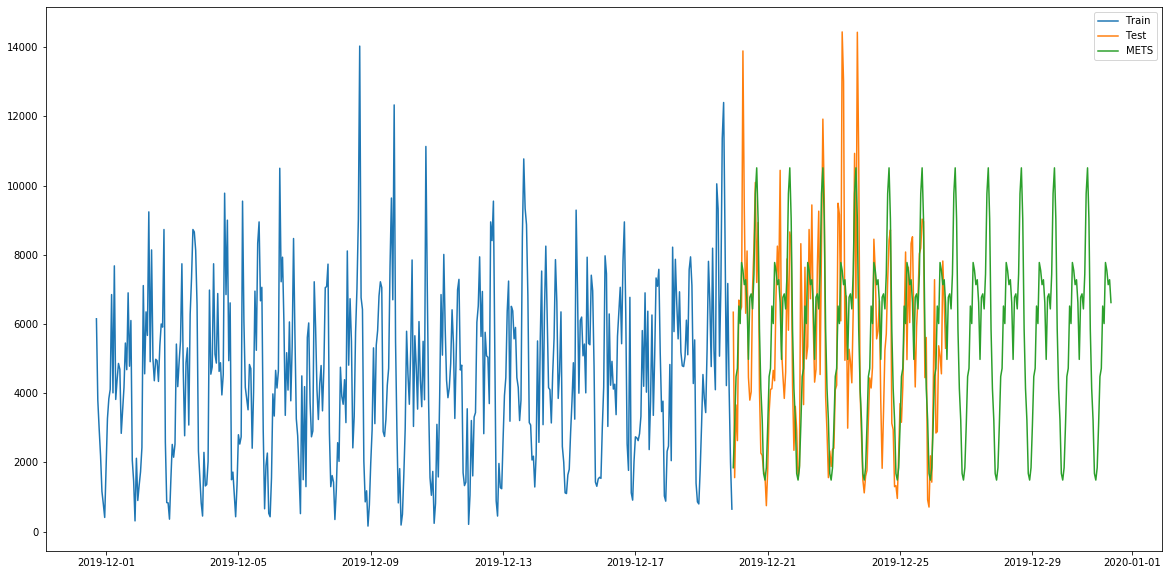

In [35]:
plt.figure(figsize=(20,10))
plt.plot(train_data['metric_value'], label='Train')
plt.plot(test_data['metric_value'], label='Test')
plt.plot(Forecasting, label='METS')
plt.legend(loc='best')
plt.show()

In [36]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data.metric_value, Forecasting['2019-12-19 23:00:00':'2019-12-26 09:00:00']))
rmse = round(rmse, 3)
rmse

2042.375

In [37]:
# Mean Absolute Percentage Error
abs_error = np.abs(test_data['metric_value']-Forecasting['2019-12-19 23:00:00':'2019-12-26 09:00:00'])
actual = test_data['metric_value']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3634

In [41]:
len(training_data.list_data[0]['target'])

462

In [87]:
# DeepAR+

In [88]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": data.index[0], "target": data.metric_value[:"2019-12-19 22:00:00"]}],
    freq = "H"
)

In [89]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="H", prediction_length=predict_len, trainer=Trainer(epochs=500))
predictor = estimator.train(training_data=training_data)

INFO:root:Using CPU
INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:20<00:00,  2.44it/s, avg_epoch_loss=8.98]
INFO:root:Epoch[0] Elapsed time 20.457 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.977376
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:14<00:00,  3.36it/s, avg_epoch_loss=8.7] 
INFO:root:Epoch[1] Elapsed time 14.870 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.703865
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.57it/s, avg_epoch_loss=8.59]
INFO:root:Epoch[2] Elapsed time 13.992 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=8.591778
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:14<00:00,  3.48it/s, avg_epoch_loss=8.49]
INFO:root:Epoch[3] Elapsed time 14.374 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=8.491950
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=7.090602
INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[37] Elapsed time 13.614 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.071656
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.63it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[38] Elapsed time 13.768 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.042213
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.69it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 13.559 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.060170
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.62it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[40] Elapsed time 13.832 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.018425
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 

INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.69it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[74] Elapsed time 13.562 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.650206
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[75] Elapsed time 13.667 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.640111
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.68it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[76] Elapsed time 13.599 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.635748
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.64it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[77] Elapsed time 13.737 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.625243
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=6.61]
INFO:roo

100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[111] Elapsed time 13.669 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.394132
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.62it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[112] Elapsed time 13.826 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.394062
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=6.4] 
INFO:root:Epoch[113] Elapsed time 13.667 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.401213
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=6.4] 
INFO:root:Epoch[114] Elapsed time 13.713 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.402498
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.68it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[115] Elapsed time 13.59

INFO:root:Epoch[148] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[148] Elapsed time 13.679 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.241490
INFO:root:Epoch[149] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[149] Elapsed time 13.684 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.251935
INFO:root:Epoch[150] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[150] Elapsed time 13.626 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.227829
INFO:root:Epoch[151] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.64it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[151] Elapsed time 13.754 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.209608
INFO:root:Epoch[152] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=6

INFO:root:Epoch[185] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[185] Elapsed time 13.608 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.110789
INFO:root:Epoch[186] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[186] Elapsed time 13.623 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.141811
INFO:root:Epoch[187] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[187] Elapsed time 13.632 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.109755
INFO:root:Epoch[188] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[188] Elapsed time 13.629 seconds
INFO:root:Epoch[188] Evaluation metric 'epoch_loss'=6.128700
INFO:root:Epoch[189] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=6

INFO:root:Epoch[222] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[222] Elapsed time 13.671 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.022283
INFO:root:Epoch[223] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.68it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[223] Elapsed time 13.580 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.014159
INFO:root:Epoch[224] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[224] Elapsed time 13.639 seconds
INFO:root:Epoch[224] Evaluation metric 'epoch_loss'=6.007269
INFO:root:Epoch[225] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.68it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[225] Elapsed time 13.574 seconds
INFO:root:Epoch[225] Evaluation metric 'epoch_loss'=6.012947
INFO:root:Epoch[226] Learning rate is 0.001
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=6

INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.825594
INFO:root:Epoch[259] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[259] Elapsed time 13.631 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.838804
INFO:root:Epoch[260] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[260] Elapsed time 13.662 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=5.821585
INFO:root:Epoch[261] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[261] Elapsed time 13.707 seconds
INFO:root:Epoch[261] Evaluation metric 'epoch_loss'=5.835194
INFO:root:Epoch[262] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[262] Elapsed time 13.659 seconds
INFO:root:Epoch[262] Evaluation metric 'epoch_loss'=5.839572
INFO:root:Epoch[263] Learning rate is 0.000

INFO:root:Epoch[332] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[332] Elapsed time 13.673 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.730114
INFO:root:Epoch[333] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.68it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[333] Elapsed time 13.573 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.739427
INFO:root:Epoch[334] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[334] Elapsed time 13.608 seconds
INFO:root:Epoch[334] Evaluation metric 'epoch_loss'=5.723894
INFO:root:Epoch[335] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[335] Elapsed time 13.691 seconds
INFO:root:Epoch[335] Evaluation metric 'epoch_loss'=5.746030
INFO:root:Epoch[336] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.64it/s, avg_epoch_l

INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.691169
INFO:root:Epoch[369] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[369] Elapsed time 13.684 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.688208
INFO:root:Epoch[370] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.7] 
INFO:root:Epoch[370] Elapsed time 13.657 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=5.696073
INFO:root:Epoch[371] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[371] Elapsed time 13.610 seconds
INFO:root:Epoch[371] Evaluation metric 'epoch_loss'=5.681543
INFO:root:Epoch[372] Learning rate is 0.0005
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[372] Elapsed time 13.666 seconds
INFO:root:Epoch[372] Evaluation metric 'epoch_loss'=5.687477
INFO:root:Epoch[373] Learning rate is 0.000

INFO:root:Epoch[405] Learning rate is 0.00025
100%|██████████| 50/50 [00:13<00:00,  3.68it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[405] Elapsed time 13.605 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.609945
INFO:root:Epoch[406] Learning rate is 0.00025
100%|██████████| 50/50 [00:13<00:00,  3.65it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[406] Elapsed time 13.703 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.618879
INFO:root:Epoch[407] Learning rate is 0.00025
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[407] Elapsed time 13.615 seconds
INFO:root:Epoch[407] Evaluation metric 'epoch_loss'=5.633537
INFO:root:Epoch[408] Learning rate is 0.00025
100%|██████████| 50/50 [00:13<00:00,  3.67it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[408] Elapsed time 13.643 seconds
INFO:root:Epoch[408] Evaluation metric 'epoch_loss'=5.609010
INFO:root:Epoch[409] Learning rate is 0.00025
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_ep

100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[477] Elapsed time 13.657 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.545197
INFO:root:Epoch[478] Learning rate is 0.000125
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[478] Elapsed time 13.664 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=5.541766
INFO:root:Epoch[479] Learning rate is 0.000125
100%|██████████| 50/50 [00:13<00:00,  3.64it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[479] Elapsed time 13.734 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=5.537563
INFO:root:Epoch[480] Learning rate is 0.000125
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[480] Elapsed time 13.682 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=5.536500
INFO:root:Epoch[481] Learning rate is 0.000125
100%|██████████| 50/50 [00:13<00:00,  3.66it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[481] Elapse

In [100]:
from pathlib import Path
predictor.serialize(Path("/tmp/"))

In [101]:
from gluonts.model.predictor import Predictor
predictor_deserialized = Predictor.deserialize(Path("/tmp/"))

INFO:root:Using CPU


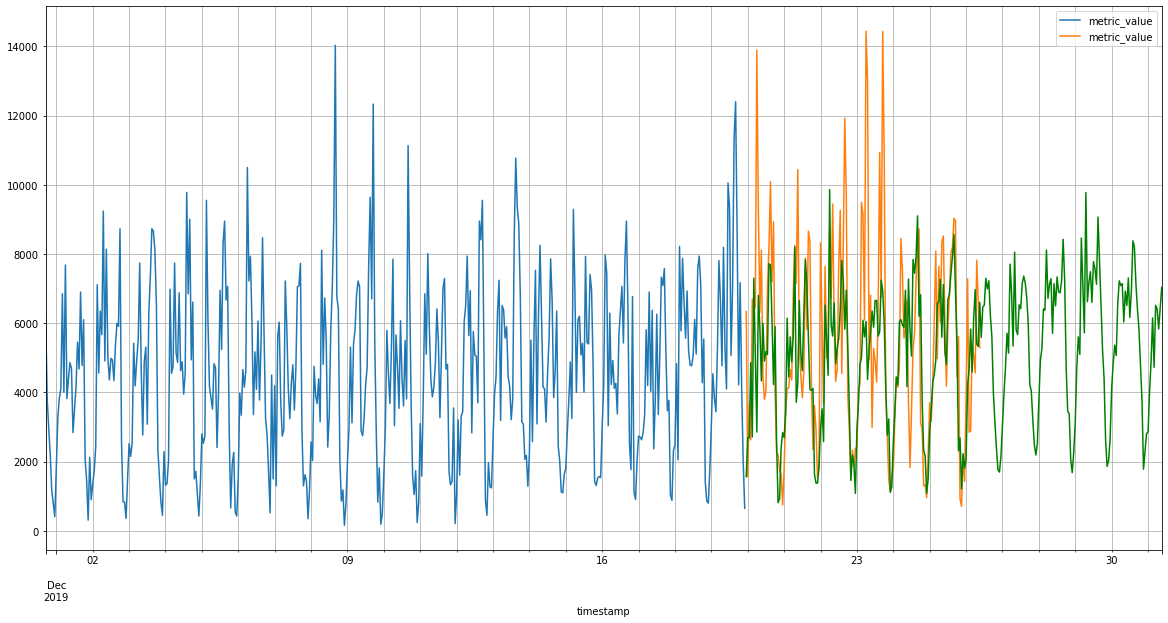

In [102]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(training_data, predictor.predict(training_data)):
#     to_pandas(test_entry)[:].plot(linewidth=2)
#     idx = pd.date_range(start='2019-12-19 23:00:00', periods=predict_len, freq='H')
#     Forecasting = pd.Series(forecast.median,index=idx)
    ax = train_data.plot()
    test_data.plot(ax=ax)
    forecast.plot(color='g', prediction_intervals=[0.0])
    DeepAR_forecast = forecast
#     Forecasting.plot(color='r', ls='--')
plt.grid(which='both')

In [103]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data.metric_value, DeepAR_forecast.median[:test_len]))
rmse = round(rmse, 3)
rmse

2476.106

In [104]:
# Mean Absolute Percentage Error
abs_error = np.abs(test_data['metric_value'] - DeepAR_forecast.median[:test_len])
actual = test_data['metric_value']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3492

In [31]:
# test with data_transfer

In [95]:
from gluonts.dataset.common import ListDataset
training_data2 = ListDataset(
    [{"start": data2.index[0], "target": data2.metric_value[:"2019-12-19 22:00:00"]}],
    freq = "H"
)

In [96]:
train_data2 = data2['2019-11-30 17:00:00':'2019-12-19 22:00:00']
test_data2 = data2['2019-12-19 23:00:00':'2019-12-26 09:00:00']
train_len = len(train_data2)
test_len = len(test_data2)

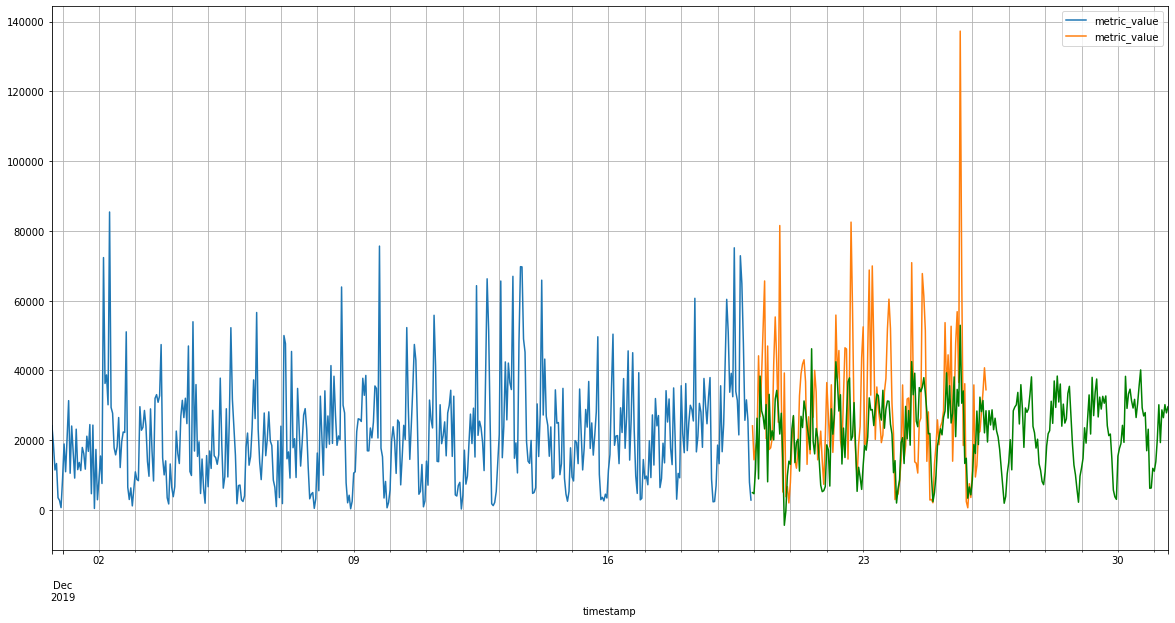

In [97]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(training_data2, predictor.predict(training_data2)):
#     to_pandas(test_entry)[:].plot(linewidth=2)
#     idx = pd.date_range(start='2019-12-19 23:00:00', periods=predict_len, freq='H')
#     Forecasting = pd.Series(forecast.median,index=idx)
    ax = train_data2.plot()
    test_data2.plot(ax=ax)
    forecast.plot(color='g', prediction_intervals=[0.0])
    DeepAR_forecast2 = forecast
#     Forecasting.plot(color='r', ls='--')
plt.grid(which='both')

In [98]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data.metric_value, DeepAR_forecast2.median[:test_len]))
rmse = round(rmse, 3)
rmse

19246.099

In [99]:
# Mean Absolute Percentage Error
abs_error = np.abs(test_data['metric_value'] - DeepAR_forecast2.median[:test_len])
actual = test_data['metric_value']
mape = np.round(np.mean(abs_error/actual),4)
mape

3.7808

In [ ]:
# NPTS

In [24]:
from gluonts.model.npts import NPTSEstimator, NPTSPredictor
from gluonts.trainer import Trainer

In [27]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": data.index[0], "target": data.metric_value[:"2019-12-19 22:00:00"]}],
    freq = "H"
)

In [65]:
NPTSEstimator?

In [67]:
estimator = NPTSEstimator(freq="H", prediction_length=predict_len)
# predictor = estimator.train(training_data=training_data)
predictor = NPTSPredictor(context_length=train_len, freq="H", prediction_length=predict_len)

In [ ]:
idx = pd.date_range(start='2019-12-19 23:00:00', periods=predict_len, freq='H')
Forecasting = pd.Series(Forecasting,index=idx)

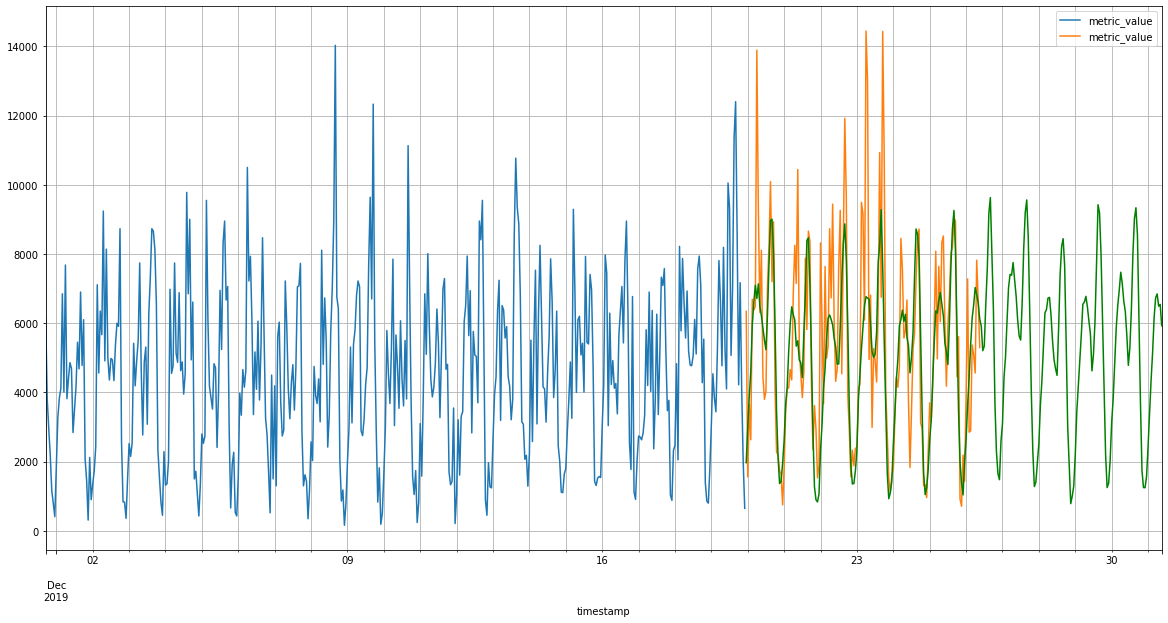

In [77]:


from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(training_data, predictor.predict(training_data)):
#     to_pandas(test_entry)[:].plot(linewidth=2)
#     idx = pd.date_range(start='2019-12-19 23:00:00', periods=predict_len, freq='H')
#     Forecasting = pd.Series(forecast.median,index=idx)
    ax = train_data.plot()
    test_data.plot(ax=ax)
    forecast.plot(color='g', prediction_intervals=[0.0])
    NPTS_forecast = forecast
#     Forecasting.plot(color='r', ls='--')
plt.grid(which='both')

In [78]:
NPTS_forecast.median

array([1969.12643313, 3017.0598524 , 3878.61208803, 4604.04582034,
       5950.6665725 , 6598.85890728, 7095.69271648, 6714.5760765 ,
       7135.28661061, 6482.05633687, 6211.69170362, 5870.26561098,
       5511.28762676, 5233.51663701, 6228.69923585, 7687.16254116,
       8964.98071075, 9005.24064882, 8056.84711336, 5939.5103248 ,
       3445.52209364, 2114.56670694, 1365.94243639, 1425.71565675,
       1950.70219094, 2617.37644981, 3666.07517211, 4149.05293863,
       5182.22542853, 5985.86744498, 6472.95722176, 6243.67410139,
       6092.23472571, 5335.32596146, 5492.24169026, 4933.42205623,
       4854.82566525, 4426.82246917, 5729.84923922, 6836.86111661,
       8392.32560693, 8468.37224351, 7138.96714564, 5132.65375094,
       2835.42312059, 1271.73107859,  896.0076987 ,  835.63659335,
       1064.24867644, 2347.18732153, 3063.98282404, 4141.32695588,
       4680.91106421, 5555.58841681, 6144.94453069, 6237.56596206,
       6108.35821806, 5950.1603127 , 5558.43140836, 5301.44360

In [79]:
NPTS_forecast.quantile(0.1)

array([  540.64895718,  1194.55720272,  1561.22057097,  2714.80369456,
        4046.06251601,  4622.84260905,  4977.07872663,  5125.71215449,
        4949.78790179,  4683.52514646,  4117.57525525,  4175.12996584,
        3612.04335658,  3059.77465041,  4317.02164296,  5875.22094167,
        7005.71430896,  7034.67000652,  6047.07293325,  4279.68909592,
        1893.77429072,   -37.70112394,  -661.23271872,  -811.72540761,
        -129.16293379,   218.88965778,  1355.1317987 ,  2693.68194353,
        3189.26644498,  3870.0806139 ,  4967.17567227,  4086.00118375,
        4041.65769191,  3679.58377826,  3840.02098269,  3013.31817197,
        2839.35922791,  3037.73173125,  3404.68535971,  5011.4635271 ,
        6184.1169191 ,  6192.87864618,  5328.31591543,  3374.29521771,
        1024.73470488,  -461.04044662, -1019.25573704, -1052.84142863,
        -484.54499322,    50.47250745,  1085.95499491,  1926.12682126,
        3166.51351552,  3573.10370218,  4331.65578763,  4150.1563139 ,
      

In [131]:
predict_len

275

In [80]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data.metric_value, NPTS_forecast.median[:test_len]))
rmse = round(rmse, 3)
rmse

1997.35

In [81]:
# Mean Absolute Percentage Error
abs_error = np.abs(test_data['metric_value'] - NPTS_forecast.median[:test_len])
actual = test_data['metric_value']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2879

In [165]:
# Prophet

In [166]:
# fbprophet

In [135]:
from fbprophet import Prophet

In [6]:
data = pd.read_csv('/home/dangdbh/Downloads/time-series-prediction-testcases/demo_aws_forecast/input_AWS_predict/request.csv', engine='python', names=['metric_name','timestamp', 'metric_value'], skiprows=1)

In [137]:
df = data[:train_len]
# df = data

In [138]:
df['ds'] = df['timestamp']
df['y'] = df['metric_value']

In [139]:
df = df.drop(labels=['metric_name','timestamp', 'metric_value'], axis=1)

In [164]:
m.predict?

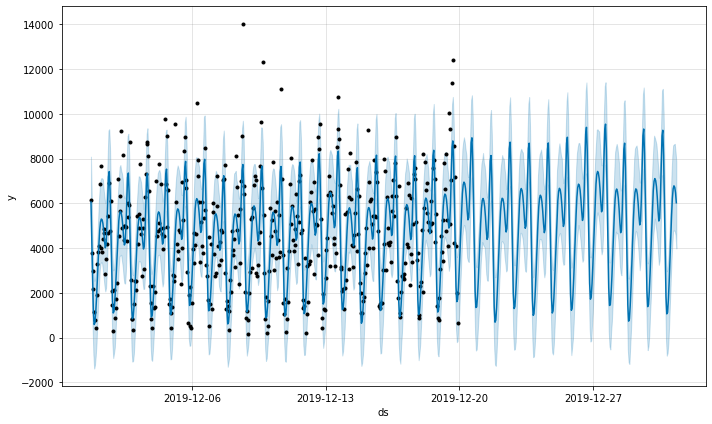

In [140]:
m = Prophet(seasonality_mode=random.choice(['additive','multiplicative']),yearly_seasonality=False)
# m = Prophet()
m.add_country_holidays(country_name='VN')
m.fit(df)
future = m.make_future_dataframe(predict_len, freq='H')
forecast = m.predict(future)
fig = m.plot(forecast)

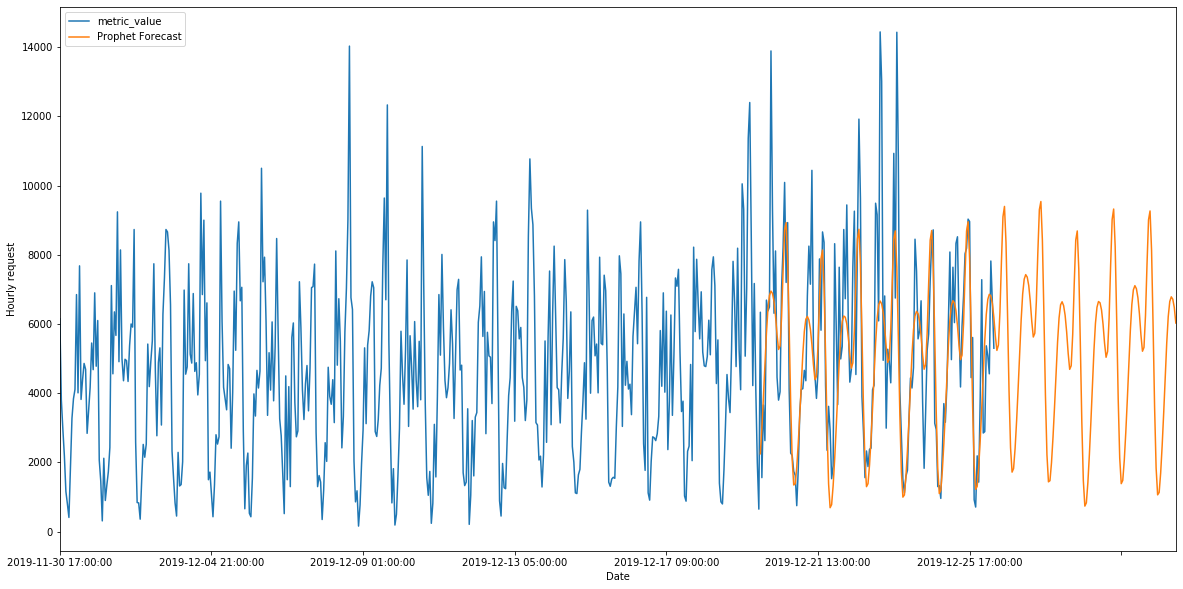

In [141]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
# # plt.rcParams.update({'font.size': 12})
# # plt.style.use('ggplot')
# data['timestamp']=pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')
data.set_index(['timestamp'], inplace=True)
ax = data.metric_value.plot()
forecast[-predict_len:].yhat.plot(ax=ax, label='Prophet Forecast')
plt.ylabel('Hourly request')
plt.xlabel('Date')
plt.legend(loc=2)
plt.show()

In [162]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Hung Kings Commemorations,Hung Kings Commemorations_lower,Hung Kings Commemorations_upper,Labor Day/International Workers' Day,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-11-30 17:00:00,4271.102754,4201.044723,8087.805827,4271.102754,4271.102754,0.0,0.0,0.0,0.0,...,0.418709,0.418709,0.418709,-0.098452,-0.098452,-0.098452,0.0,0.0,0.0,6059.451090
1,2019-11-30 18:00:00,4272.188482,2397.778567,6286.887871,4272.188482,4272.188482,0.0,0.0,0.0,0.0,...,0.022868,0.022868,0.022868,-0.098944,-0.098944,-0.098944,0.0,0.0,0.0,4369.883031
2,2019-11-30 19:00:00,4273.274210,542.934034,4465.592712,4273.274210,4273.274210,0.0,0.0,0.0,0.0,...,-0.407925,-0.407925,-0.407925,-0.098665,-0.098665,-0.098665,0.0,0.0,0.0,2530.098070
3,2019-11-30 20:00:00,4274.359938,-748.026641,3040.051507,4274.359938,4274.359938,0.0,0.0,0.0,0.0,...,-0.724933,-0.724933,-0.724933,-0.097633,-0.097633,-0.097633,0.0,0.0,0.0,1175.733699
4,2019-11-30 21:00:00,4275.445666,-1379.917345,2544.999116,4275.445666,4275.445666,0.0,0.0,0.0,0.0,...,-0.862319,-0.862319,-0.862319,-0.095873,-0.095873,-0.095873,0.0,0.0,0.0,588.646714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,2019-12-31 05:00:00,5470.332195,4783.663310,8595.632418,5430.693975,5510.671397,0.0,0.0,0.0,0.0,...,0.215453,0.215453,0.215453,-0.051749,-0.051749,-0.051749,0.0,0.0,0.0,6648.932500
733,2019-12-31 06:00:00,5472.348304,4779.853724,8629.015401,5432.518952,5512.922546,0.0,0.0,0.0,0.0,...,0.239811,0.239811,0.239811,-0.051622,-0.051622,-0.051622,0.0,0.0,0.0,6784.676741
734,2019-12-31 07:00:00,5474.364414,4784.280214,8659.568275,5434.169813,5515.194019,0.0,0.0,0.0,0.0,...,0.226728,0.226728,0.226728,-0.051118,-0.051118,-0.051118,0.0,0.0,0.0,6715.554559
735,2019-12-31 08:00:00,5476.380523,4588.855043,8316.601243,5435.949882,5517.465491,0.0,0.0,0.0,0.0,...,0.182087,0.182087,0.182087,-0.050257,-0.050257,-0.050257,0.0,0.0,0.0,6473.559140


In [167]:
forecast.quantile()

trend                                         4736.468375
yhat_lower                                    3207.486139
yhat_upper                                    7050.549842
trend_lower                                   4736.468375
trend_upper                                   4736.468375
Hung Kings Commemorations                        0.000000
Hung Kings Commemorations_lower                  0.000000
Hung Kings Commemorations_upper                  0.000000
Labor Day/International Workers' Day             0.000000
Labor Day/International Workers' Day_lower       0.000000
Labor Day/International Workers' Day_upper       0.000000
National Day                                     0.000000
National Day_lower                               0.000000
National Day_upper                               0.000000
New Year's Day                                   0.000000
New Year's Day_lower                             0.000000
New Year's Day_upper                             0.000000
Reunification 

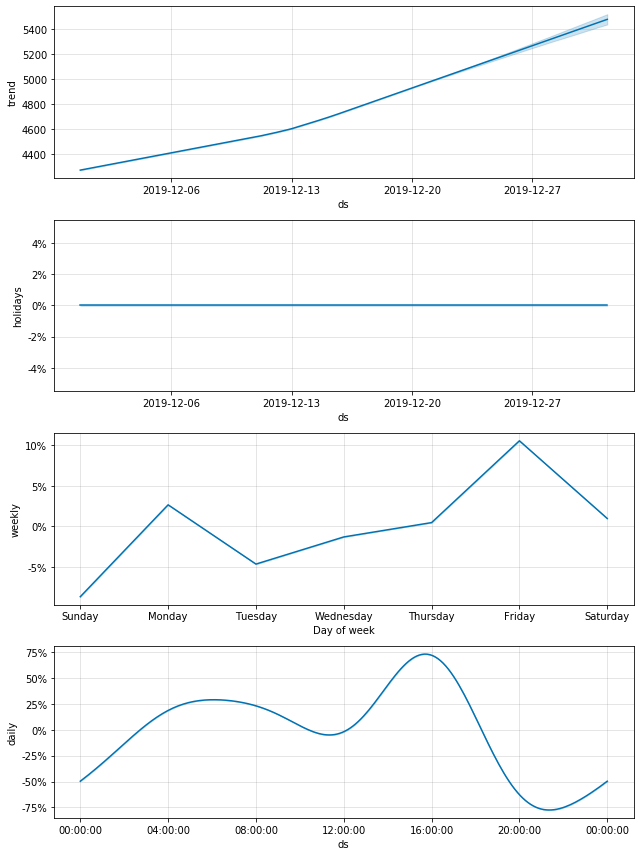

In [142]:
fig = m.plot_components(forecast)

In [168]:
#prophet AWS

In [150]:
from gluonts.model.prophet import ProphetPredictor
from fbprophet import Prophet

In [151]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": data.index[0], "target": data.metric_value[:"2019-12-19 22:00:00"]}],
    freq = "H"
)

In [152]:
# estimator = NPTSEstimator(freq="H", prediction_length=predict_len)
# predictor = estimator.train(training_data=training_data)
m = Prophet(seasonality_mode=random.choice(['additive','multiplicative']),yearly_seasonality=False)
prophet_params = {'seasonality_mode': 'multiplicative', 'yearly_seasonality': False}
predictor = ProphetPredictor(prophet_params=prophet_params, freq="H", prediction_length=predict_len)

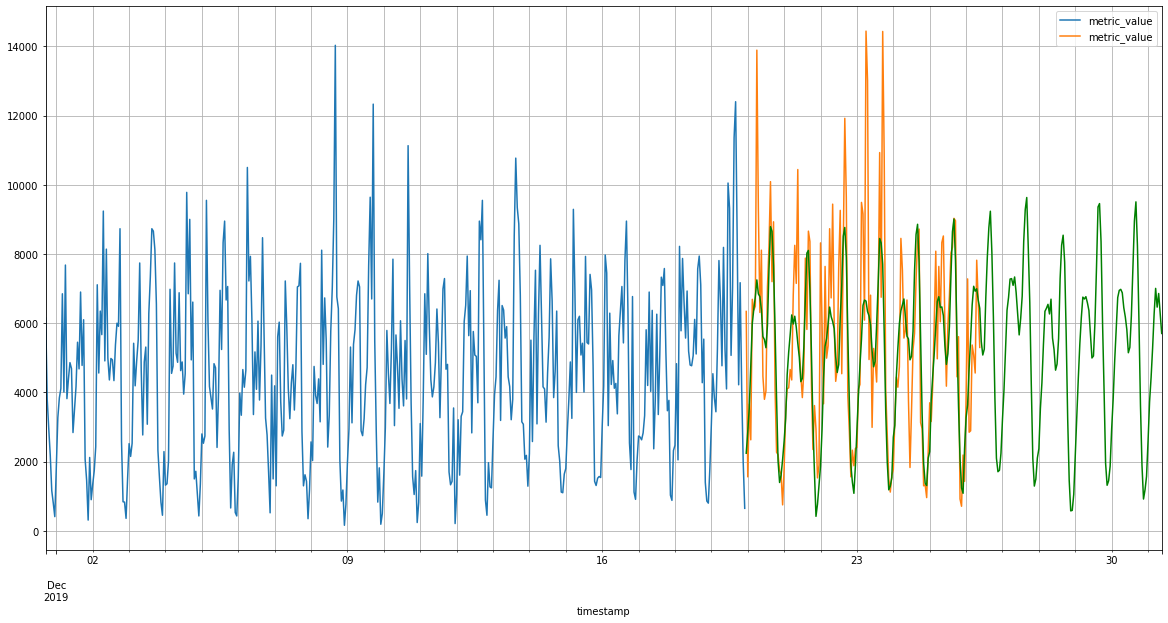

In [153]:
from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(training_data, predictor.predict(training_data)):
#     to_pandas(test_entry)[:].plot(linewidth=2)
#     idx = pd.date_range(start='2019-12-19 23:00:00', periods=predict_len, freq='H')
#     Forecasting = pd.Series(forecast.median,index=idx)
    ax = train_data.plot()
    test_data.plot(ax=ax)
    forecast.plot(color='g', prediction_intervals=[0.0])
    Prophet_forecast = forecast
#     Forecasting.plot(color='r', ls='--')
plt.grid(which='both')

In [154]:
from gluonts.model.forecast import Quantile

In [116]:
num_samples = 100

In [138]:
samples = Prophet_forecast.samples

In [139]:
test = np.sort(samples, axis=0)

In [155]:
Prophet_forecast.quantile(0.1)

array([  323.52794643,  1205.57174713,  1935.47282542,  2853.9275001 ,
        4204.02453387,  4535.26472722,  5289.26072049,  4910.78659425,
        4571.19859557,  4698.37548364,  4214.18233004,  3691.57889068,
        3650.5531222 ,  3483.76259857,  4084.67214162,  5649.34087353,
        6633.18189754,  6817.38576922,  6211.79533536,  4064.9588521 ,
        1980.14520193,   673.19501255,  -400.87470607,  -465.67339704,
        -236.46839771,   409.28196656,  1481.5448534 ,  2578.64867755,
        3310.5012953 ,  3576.89660335,  3992.2601508 ,  4026.72524204,
        4418.38969865,  3747.7336429 ,  3724.48020894,  3456.56843186,
        2531.24905894,  2264.25861695,  3566.8126062 ,  4846.23858185,
        6200.38984599,  6318.62664188,  5109.80397929,  3316.71644563,
         884.89566884,  -754.94049243, -1259.59709103, -1216.19747824,
        -377.37821839,   223.10922768,  1019.59797842,  1718.02039212,
        3270.57347092,  4033.74527926,  3894.39162086,  4452.79016136,
      

In [141]:
q90 = test[sample_idx, :]

In [148]:
test[89,0]

4101.7524115993065

In [142]:
q90

array([ 4101.7524116 ,  5417.05035482,  6074.95869332,  6555.92828913,
        7696.9344863 ,  8095.00742785,  8641.89360168,  8672.96708293,
        8404.97978054,  8458.0251346 ,  8263.24341441,  7752.41291379,
        7082.25523452,  7689.87368512,  7882.63819679,  9669.13473672,
       10322.32160076, 10957.23687012,  9720.4657078 ,  7764.91925396,
        5297.43149738,  3597.5274123 ,  3223.90615141,  3369.65734608,
        3545.35042273,  4615.5906318 ,  5306.60564579,  6172.40855331,
        7328.27070512,  7611.34354325,  8031.87544225,  8288.62191097,
        7609.24190041,  7627.72379649,  7521.25995297,  7266.35117476,
        5992.19964403,  6214.60260209,  6722.42382613,  8897.34191142,
        9723.78108987, 10325.28965775,  8902.33792075,  6595.24025008,
        4857.20134198,  3272.1486766 ,  2558.67933524,  2221.02558556,
        3085.92870636,  3702.84424133,  4480.42145695,  5556.22428394,
        6662.20054152,  7669.8784487 ,  8031.39565203,  8201.81188085,
      

In [134]:
q = Quantile.parse(0.9).value
q

0.9

In [135]:
sample_idx = int(np.round((100 - 1) * q))
sample_idx

89

In [120]:
sample_idx

10

In [ ]:
test

In [137]:
Prophet_forecast.samples

array([[1842.04527424,  -98.49455248, 5833.39353736, ..., 5923.1071502 ,
        4816.79895162, 7389.13824939],
       [1177.30081796, 3768.58661813, 3923.32224932, ..., 7489.77588896,
        5994.66361507, 5493.10209795],
       [4102.03326256, 3505.59646225, 1969.20957148, ..., 8101.13851899,
        6949.01332925, 5487.09296386],
       ...,
       [-519.05983556, 4129.26737083, 1688.40795328, ..., 6632.1029049 ,
        6472.04639679, 5784.7080777 ],
       [3961.70592547,  980.11354374, 1403.30365291, ..., 4770.30814358,
        5834.34253291, 5434.45373478],
       [2622.37093148, -761.68446123, 3840.44138697, ..., 6202.34438888,
        5461.57066752, 8018.97030905]])

In [109]:
Prophet_forecast.quantile(0.5)

array([2568.93799404, 3140.19328662, 3840.44138697, 4795.11068817,
       5819.1250221 , 6358.38766323, 6731.02936159, 6996.95298934,
       6798.47791287, 6698.10421524, 6249.51422625, 5902.66557485,
       5306.19749765, 5525.08987644, 6242.90182737, 7949.47327713,
       8862.57004777, 8964.34047781, 8056.49204696, 5983.54168415,
       3915.58597762, 2306.28248585, 1473.1072651 , 1815.30428587,
       1825.00537046, 2527.66102107, 3508.10548785, 4487.72103966,
       5455.92818863, 5728.43227915, 6064.59879966, 6472.42350647,
       6231.88568493, 5514.48899545, 5478.43155957, 4820.89778021,
       4503.91748008, 4427.75316545, 4858.70592134, 6925.95579762,
       8295.04995436, 8182.94175777, 7288.13671406, 4890.93504898,
       2942.83051446, 1414.09482223,  837.61494241,  403.2568498 ,
       1399.45543086, 1975.05278648, 3076.62293573, 3944.03096611,
       4868.44754804, 5533.15528841, 5862.17843735, 6201.57792229,
       6392.97262613, 6044.76538808, 5944.16578264, 5441.82207

In [110]:
Prophet_forecast.median

array([2568.93799404, 3140.19328662, 3840.44138697, 4795.11068817,
       5819.1250221 , 6358.38766323, 6731.02936159, 6996.95298934,
       6798.47791287, 6698.10421524, 6249.51422625, 5902.66557485,
       5306.19749765, 5525.08987644, 6242.90182737, 7949.47327713,
       8862.57004777, 8964.34047781, 8056.49204696, 5983.54168415,
       3915.58597762, 2306.28248585, 1473.1072651 , 1815.30428587,
       1825.00537046, 2527.66102107, 3508.10548785, 4487.72103966,
       5455.92818863, 5728.43227915, 6064.59879966, 6472.42350647,
       6231.88568493, 5514.48899545, 5478.43155957, 4820.89778021,
       4503.91748008, 4427.75316545, 4858.70592134, 6925.95579762,
       8295.04995436, 8182.94175777, 7288.13671406, 4890.93504898,
       2942.83051446, 1414.09482223,  837.61494241,  403.2568498 ,
       1399.45543086, 1975.05278648, 3076.62293573, 3944.03096611,
       4868.44754804, 5533.15528841, 5862.17843735, 6201.57792229,
       6392.97262613, 6044.76538808, 5944.16578264, 5441.82207

In [111]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data.metric_value, Prophet_forecast.median[:test_len]))
rmse = round(rmse, 3)
rmse

2012.278

In [112]:
# Mean Absolute Percentage Error
abs_error = np.abs(test_data['metric_value'] - Prophet_forecast.median[:test_len])
actual = test_data['metric_value']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2857